In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df_wine=pd.read_csv('winequality-red.csv')
df_wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df_wine.shape #1599 rows and 12 columns

(1599, 12)

In [4]:
df_wine.isnull().sum() # no null values presents

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
df_wine.skew() #outliers are presents ...some colums are highly skewed

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.318337
residual_sugar          4.540655
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

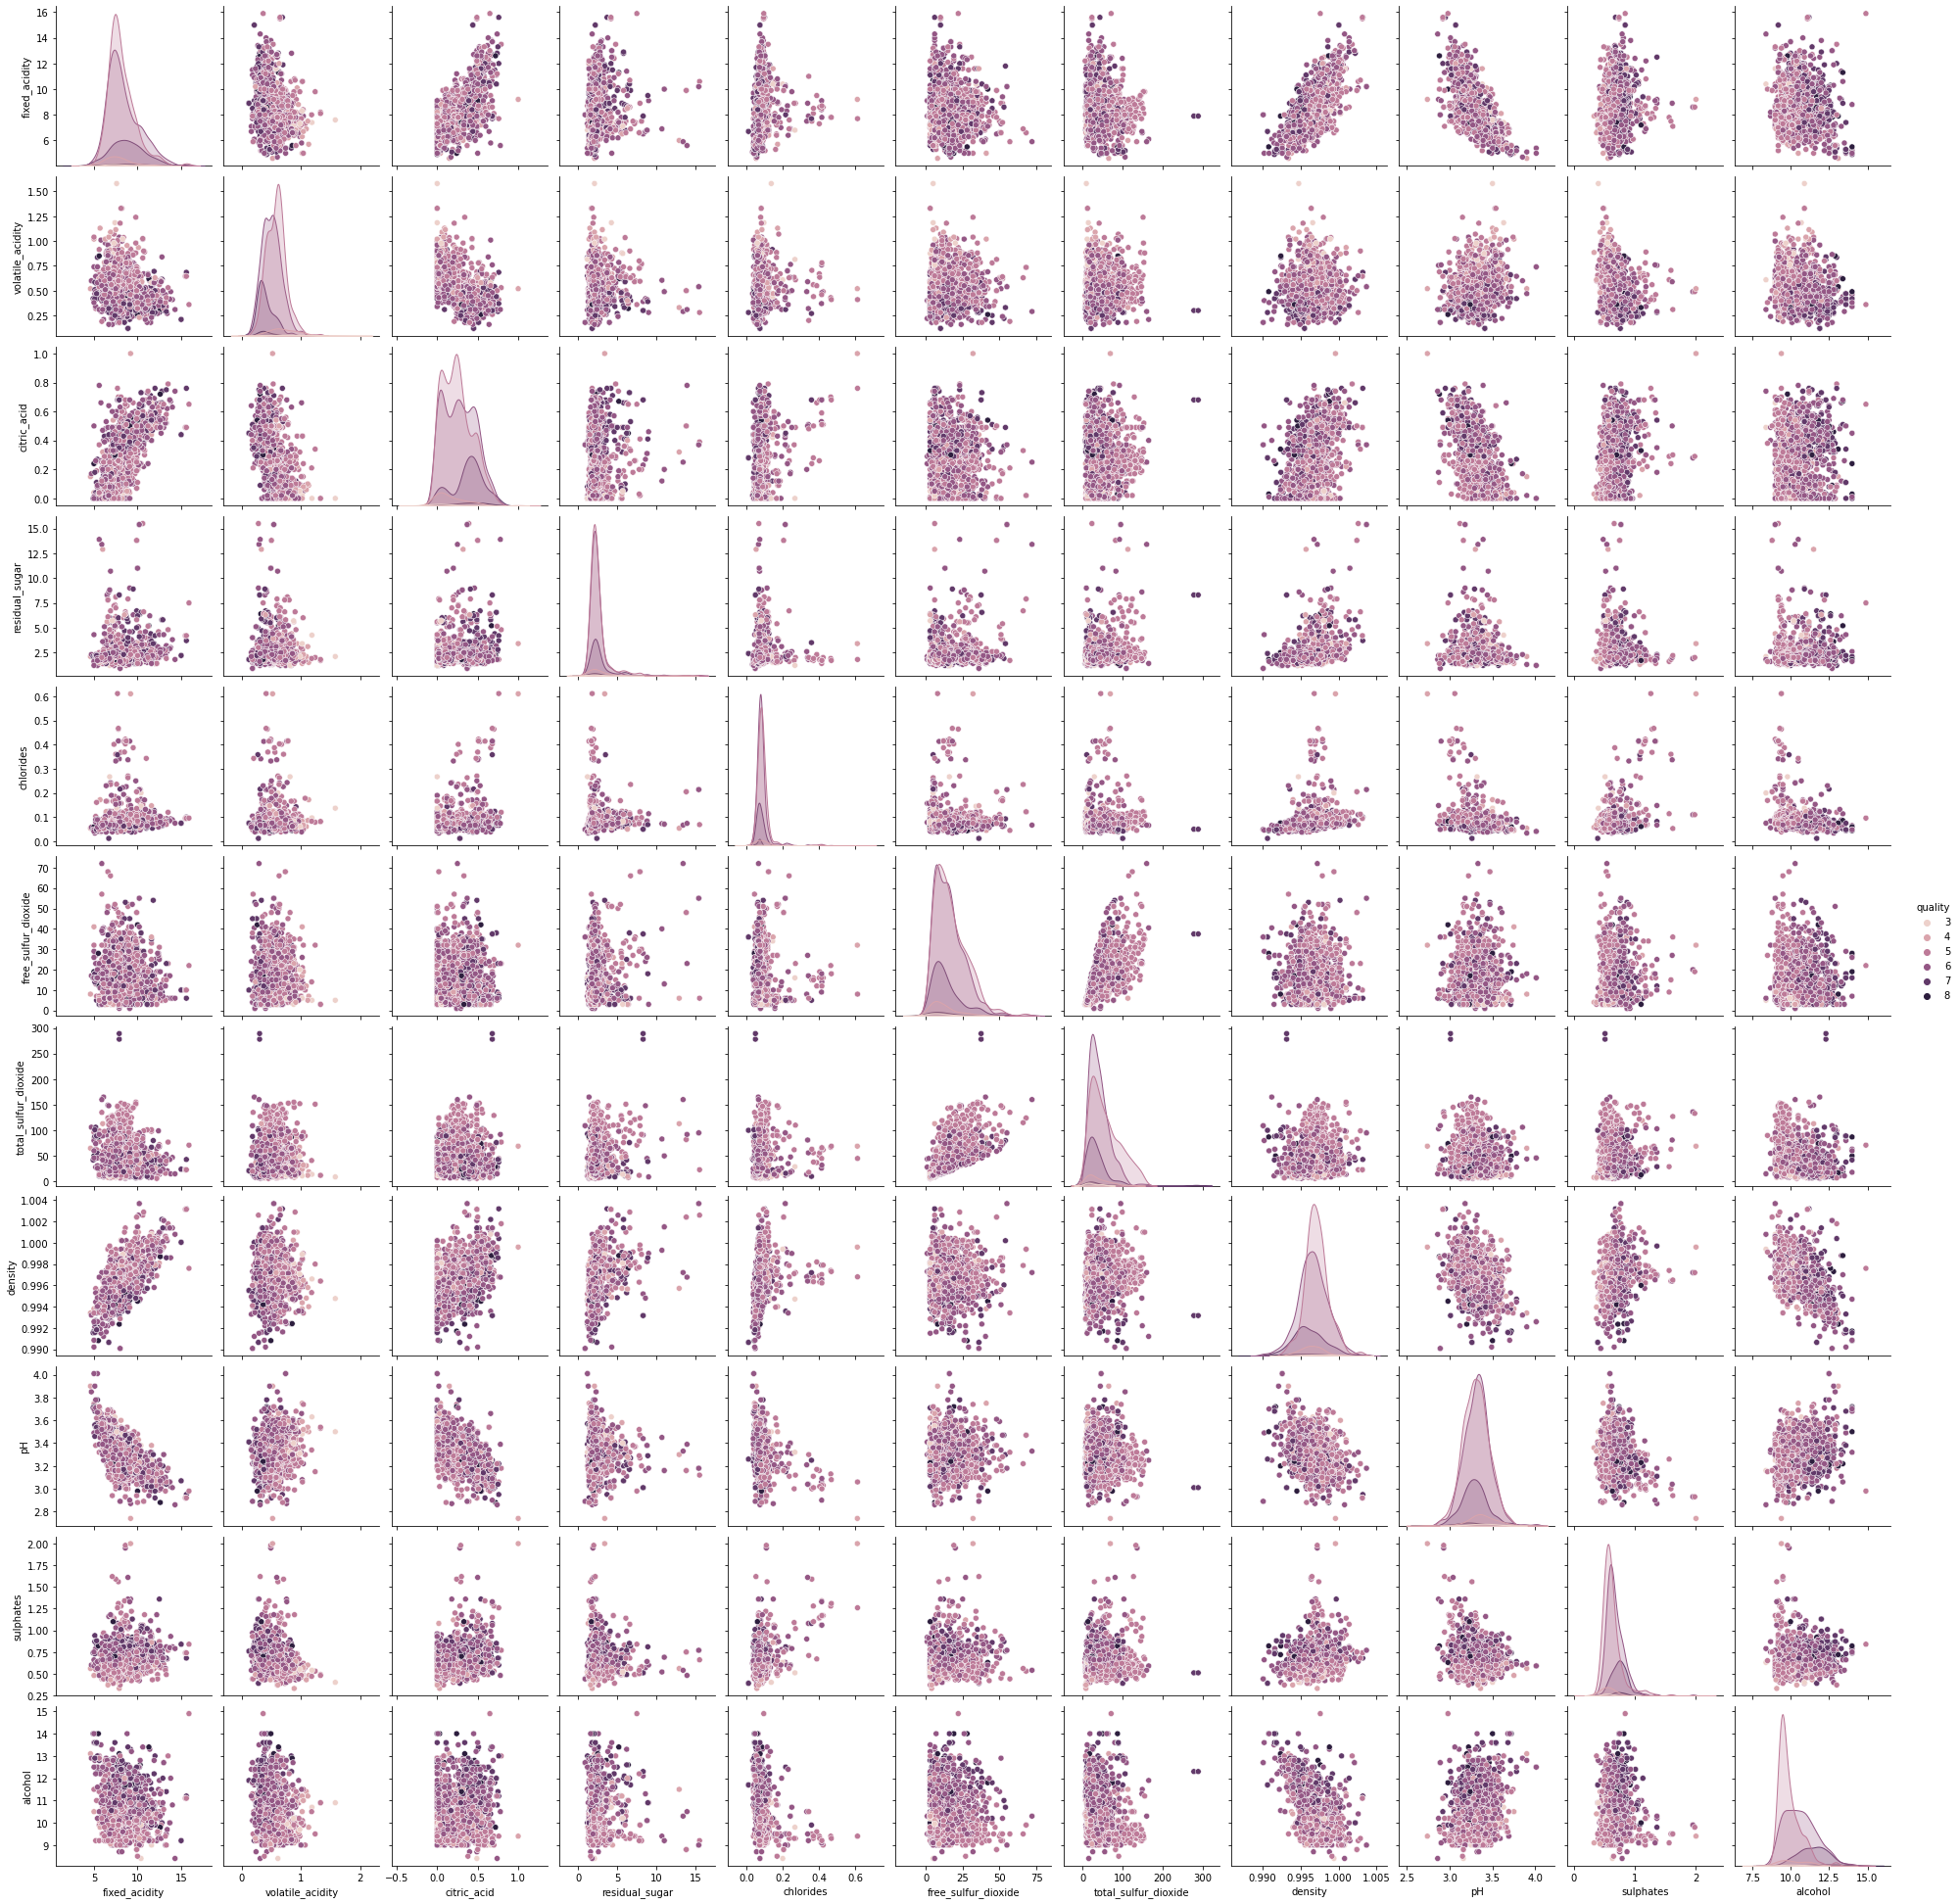

In [7]:
sns.pairplot(df_wine,hue='quality')

<AxesSubplot:>

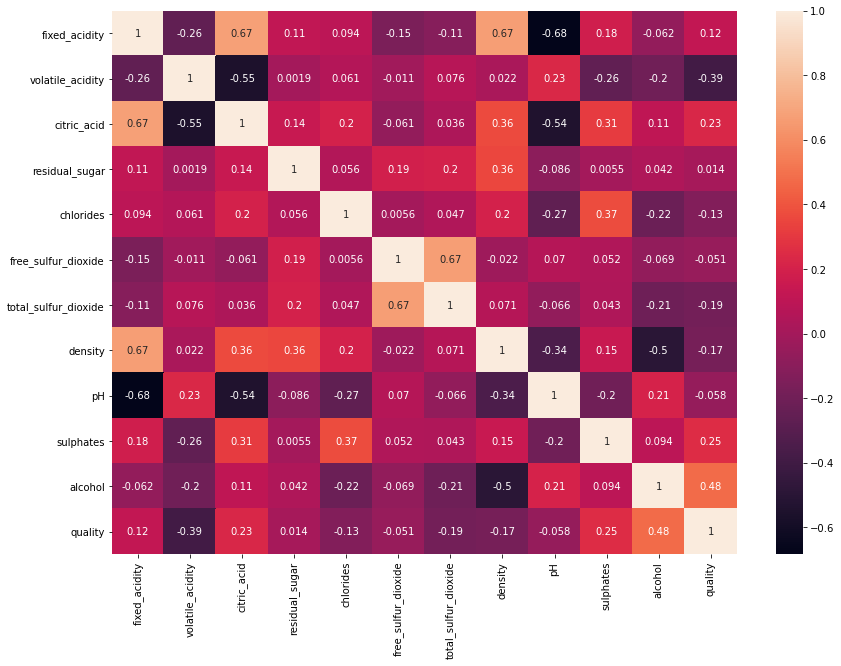

In [8]:
# checking multicolinearity

plt.figure(figsize=(14,10))
sns.heatmap(df_wine.corr(),annot=True)

In [15]:
x=df_wine.drop('quality',axis=1)
y=df_wine['quality']

## KMeans

### Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
s_c=StandardScaler()
df_wine_scaled=pd.DataFrame(s_c.fit_transform(x),columns=x.columns)

In [18]:
num=range(1,15)
error=[]
for n in num :
    cluster=KMeans(n_clusters=n)
    cluster.fit(df_wine_scaled)
    centroid=cluster.cluster_centers_
    error.append(cluster.inertia_)
    
inf=pd.DataFrame({'Number of clusters':num,'Errors':error})
inf

Number of clusters        Errors
0                    1  17589.000000
1                    2  14330.142460
2                    3  12630.010165
3                    4  11294.210161
4                    5  10155.509585
5                    6   9364.811413
6                    7   8645.227394
7                    8   8301.693992
8                    9   7971.510229
9                   10   7722.538084
10                  11   7452.375149
11                  12   7254.780841
12                  13   7032.796865
13                  14   6850.056691

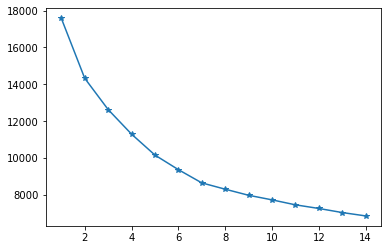

In [19]:
plt.plot(inf['Number of clusters'],inf.Errors,marker='*')

In [24]:
# either 2 or 7 will be the number of clusters

In [20]:
from sklearn.metrics import silhouette_score
c=[2,3,4,5,6,7,8]

for p in c :
    cluster=KMeans(n_clusters=p)
    label=cluster.fit_predict(df_wine_scaled)
    score=silhouette_score(df_wine_scaled,label,random_state=10)
    print('The score of',p,'is',score)

The score of 2 is 0.2137299633547482
The score of 3 is 0.18921017006439672
The score of 4 is 0.2063270057392923
The score of 5 is 0.19026993359227543
The score of 6 is 0.19204851011160415
The score of 7 is 0.19161525446448677
The score of 8 is 0.15149457756353982


In [27]:
#highest silhouette_score is for k=2

In [21]:
cluster=KMeans(n_clusters=2)
label_k=cluster.fit_predict(df_wine_scaled)
label_k

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
df_new=pd.DataFrame(df_wine_scaled,columns=df_wine_scaled.columns)
df_new['Label_KMeans']=label_k

In [23]:
df_new.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  Label_KMeans  
0 -0.960246             0  
1 -0.584777             0  
2 -0.584777             0  
3 -0.584777             1  
4 -0.960246             0

In [24]:
df_new..value_counts()

0    1009
1     590
Name: Label_KMeans, dtype: int64

#### Use feautes fixed acidity and volatile acidity

In [27]:
x1 = df_wine_scaled[['fixed_acidity','volatile_acidity']]

In [28]:
error=[]
for n in num :
    cluster=KMeans(n_clusters=n)
    cluster.fit(x1)
    centroid=cluster.cluster_centers_
    error.append(cluster.inertia_)

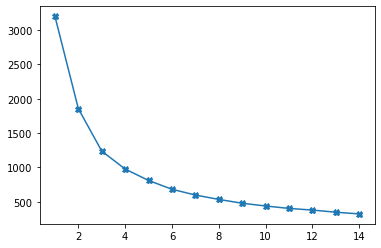

In [30]:
plt.plot(range(1,15),error,marker='X')
plt.show()
#based on elbow method, we can see that error stabilises after 3rd cluster,
#so lets try with 3 clusters

In [31]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x1)
    sil_score = silhouette_score(x1,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.40217009171277757
silhouette_score for 3 clusters: 0.3750651141393108
silhouette_score for 4 clusters: 0.35816810583447223
silhouette_score for 5 clusters: 0.3626423611440945
silhouette_score for 6 clusters: 0.3504259586575506
silhouette_score for 7 clusters: 0.33634578645510055


In [ ]:
#highest score for k = 2
#Lets consider K = 2, for builing Kmeans 

In [32]:
cluster = KMeans(n_clusters=2)
label_x1 = cluster.fit_predict(x1)
label_x1

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
x1['Labels'] = label_x1

In [34]:
x1.head()

fixed_acidity  volatile_acidity  Labels
0      -0.528360          0.961877       1
1      -0.298547          1.967442       1
2      -0.298547          1.297065       1
3       1.654856         -1.384443       0
4      -0.528360          0.961877       1

In [35]:
x1.Labels.value_counts()

1    1002
0     597
Name: Labels, dtype: int64

2.Use feautes Cirtic acidity and fixed acidity

In [43]:
x2 =  df_wine_scaled[['citric_acid','fixed_acidity']]

In [44]:
error=[]
for n in num :
    cluster=KMeans(n_clusters=n)
    cluster.fit(x2)
    centroid=cluster.cluster_centers_
    error.append(cluster.inertia_)

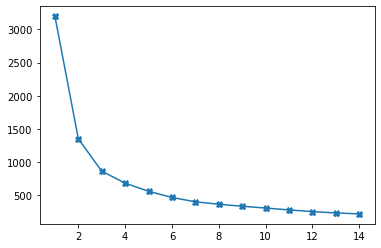

In [45]:
plt.plot(range(1,15),error,marker='X')
plt.show()

In [46]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x2)
    sil_score = silhouette_score(x2,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.49828382212526556
silhouette_score for 3 clusters: 0.432101931855055
silhouette_score for 4 clusters: 0.38833769631692217
silhouette_score for 5 clusters: 0.39150559714411776
silhouette_score for 6 clusters: 0.39144431525799633
silhouette_score for 7 clusters: 0.35928564470771807


In [41]:
#lets concider k=2

In [48]:
cluster = KMeans(n_clusters=2)
label_x2 = cluster.fit_predict(x2)
label_x2

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
x2['Labels'] = label_x2
x2.head()

citric_acid  fixed_acidity  Labels
0    -1.391472      -0.528360       0
1    -1.391472      -0.298547       0
2    -1.186070      -0.298547       0
3     1.484154       1.654856       1
4    -1.391472      -0.528360       0

3.Use feautes residual suger and sulphades

In [50]:
x3 = df_wine_scaled[['residual_sugar','sulphates']]

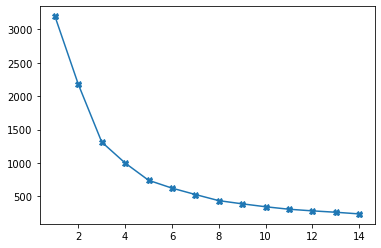

In [51]:
error=[]
for n in num :
    cluster=KMeans(n_clusters=n)
    cluster.fit(x3)
    centroid=cluster.cluster_centers_
    error.append(cluster.inertia_)
plt.plot(range(1,15),error,marker='X')
plt.show() # k=2,k=3,k=4 can be the optimal lets try shelotte

In [52]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x3)
    sil_score = silhouette_score(x3,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.6650121943532973
silhouette_score for 3 clusters: 0.5208666174912692
silhouette_score for 4 clusters: 0.45828778859764335
silhouette_score for 5 clusters: 0.47446195900593274
silhouette_score for 6 clusters: 0.35440000695340307
silhouette_score for 7 clusters: 0.35799000933497477


In [53]:
#let's consider k=2 for the clustering

In [56]:
cluster = KMeans(n_clusters=2)
label_x3 = cluster.fit_predict(x3)
label_x3

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
x3['Labels'] = label_x3
x3.head()

residual_sugar  sulphates  Labels
0       -0.453218  -0.579207       0
1        0.043416   0.128950       0
2       -0.169427  -0.048089       0
3       -0.453218  -0.461180       0
4       -0.453218  -0.579207       0

4.Use feautes free.sulfur.dioxide and total.sulfur.dioxide

In [58]:
x4 = df_wine_scaled[['free_sulfur_dioxide','total_sulfur_dioxide']]

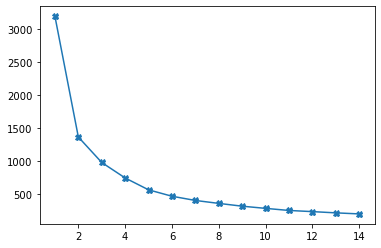

In [59]:
error=[]
for n in num :
    cluster=KMeans(n_clusters=n)
    cluster.fit(x4)
    centroid=cluster.cluster_centers_
    error.append(cluster.inertia_)
plt.plot(range(1,15),error,marker='X')
plt.show() # k=2 and k=3 can be the optimal

In [60]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x4)
    sil_score = silhouette_score(x4,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.5428673379963477
silhouette_score for 3 clusters: 0.45669911014921666
silhouette_score for 4 clusters: 0.4528392840247885
silhouette_score for 5 clusters: 0.4519848302450427
silhouette_score for 6 clusters: 0.45544395512878055
silhouette_score for 7 clusters: 0.4412073662108443


In [63]:
cluster = KMeans(n_clusters=2)
label_x4 = cluster.fit_predict(x4)
label_x4

array([0, 1, 0, ..., 1, 1, 0])

In [64]:
x4['Labels'] = label_x4
x4.head()

free_sulfur_dioxide  total_sulfur_dioxide  Labels
0            -0.466193             -0.379133       0
1             0.872638              0.624363       1
2            -0.083669              0.229047       0
3             0.107592              0.411500       1
4            -0.466193             -0.379133       0

5.Use feautes fixed acidity, citric acidity and volatile acidity

In [65]:
x5 = df_wine_scaled[['fixed_acidity','citric_acid','volatile_acidity']]

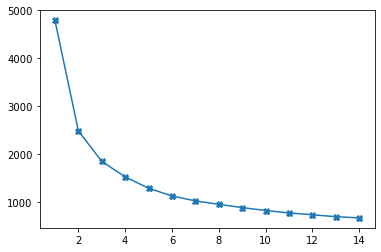

In [66]:
error=[]
for n in num :
    cluster=KMeans(n_clusters=n)
    cluster.fit(x5)
    centroid=cluster.cluster_centers_
    error.append(cluster.inertia_)
plt.plot(range(1,15),error,marker='X')
plt.show() # k=2 and k=3 can be the optimal

In [67]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x5)
    sil_score = silhouette_score(x5,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.4200658492039277
silhouette_score for 3 clusters: 0.3517981618960222
silhouette_score for 4 clusters: 0.30756529220747786
silhouette_score for 5 clusters: 0.3208483704631516
silhouette_score for 6 clusters: 0.3092077428527541
silhouette_score for 7 clusters: 0.2919145158146929


In [ ]:
#concidering k=2 for 

In [68]:
cluster = KMeans(n_clusters=2)
label_x5 = cluster.fit_predict(x5)
label_x5

array([1, 1, 1, ..., 1, 1, 0])

In [69]:
x5['Labels'] = label_x5
x5.head()

fixed_acidity  citric_acid  volatile_acidity  Labels
0      -0.528360    -1.391472          0.961877       1
1      -0.298547    -1.391472          1.967442       1
2      -0.298547    -1.186070          1.297065       1
3       1.654856     1.484154         -1.384443       0
4      -0.528360    -1.391472          0.961877       1

6.Use feautes density and pH

In [70]:
x6 = df_wine_scaled[['density','pH']]

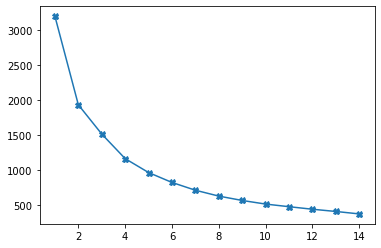

In [71]:
error=[]
for n in num :
    cluster=KMeans(n_clusters=n)
    cluster.fit(x6)
    centroid=cluster.cluster_centers_
    error.append(cluster.inertia_)
plt.plot(range(1,15),error,marker='X')
plt.show() # k=2 ,k=3 and k=4 can be the optimal

In [72]:
for clusters in range(2,8):
    model  = KMeans(clusters)
    model.fit(x6)
    sil_score = silhouette_score(x6,model.labels_)
    print('silhouette_score for', clusters,'clusters:',sil_score)

silhouette_score for 2 clusters: 0.3523978406600989
silhouette_score for 3 clusters: 0.2974465980741111
silhouette_score for 4 clusters: 0.3201351603139843
silhouette_score for 5 clusters: 0.32706084142661385
silhouette_score for 6 clusters: 0.3264353392827568
silhouette_score for 7 clusters: 0.3378273398644975


In [74]:
cluster = KMeans(n_clusters=2)
label_x6 = cluster.fit_predict(x6)
label_x6

array([1, 0, 0, ..., 1, 1, 1])

In [75]:
x6['Labels'] = label_x6
x6.head()

density        pH  Labels
0  0.558274  1.288643       1
1  0.028261 -0.719933       0
2  0.134264 -0.331177       0
3  0.664277 -0.979104       0
4  0.558274  1.288643       1

## Plotting Clusters

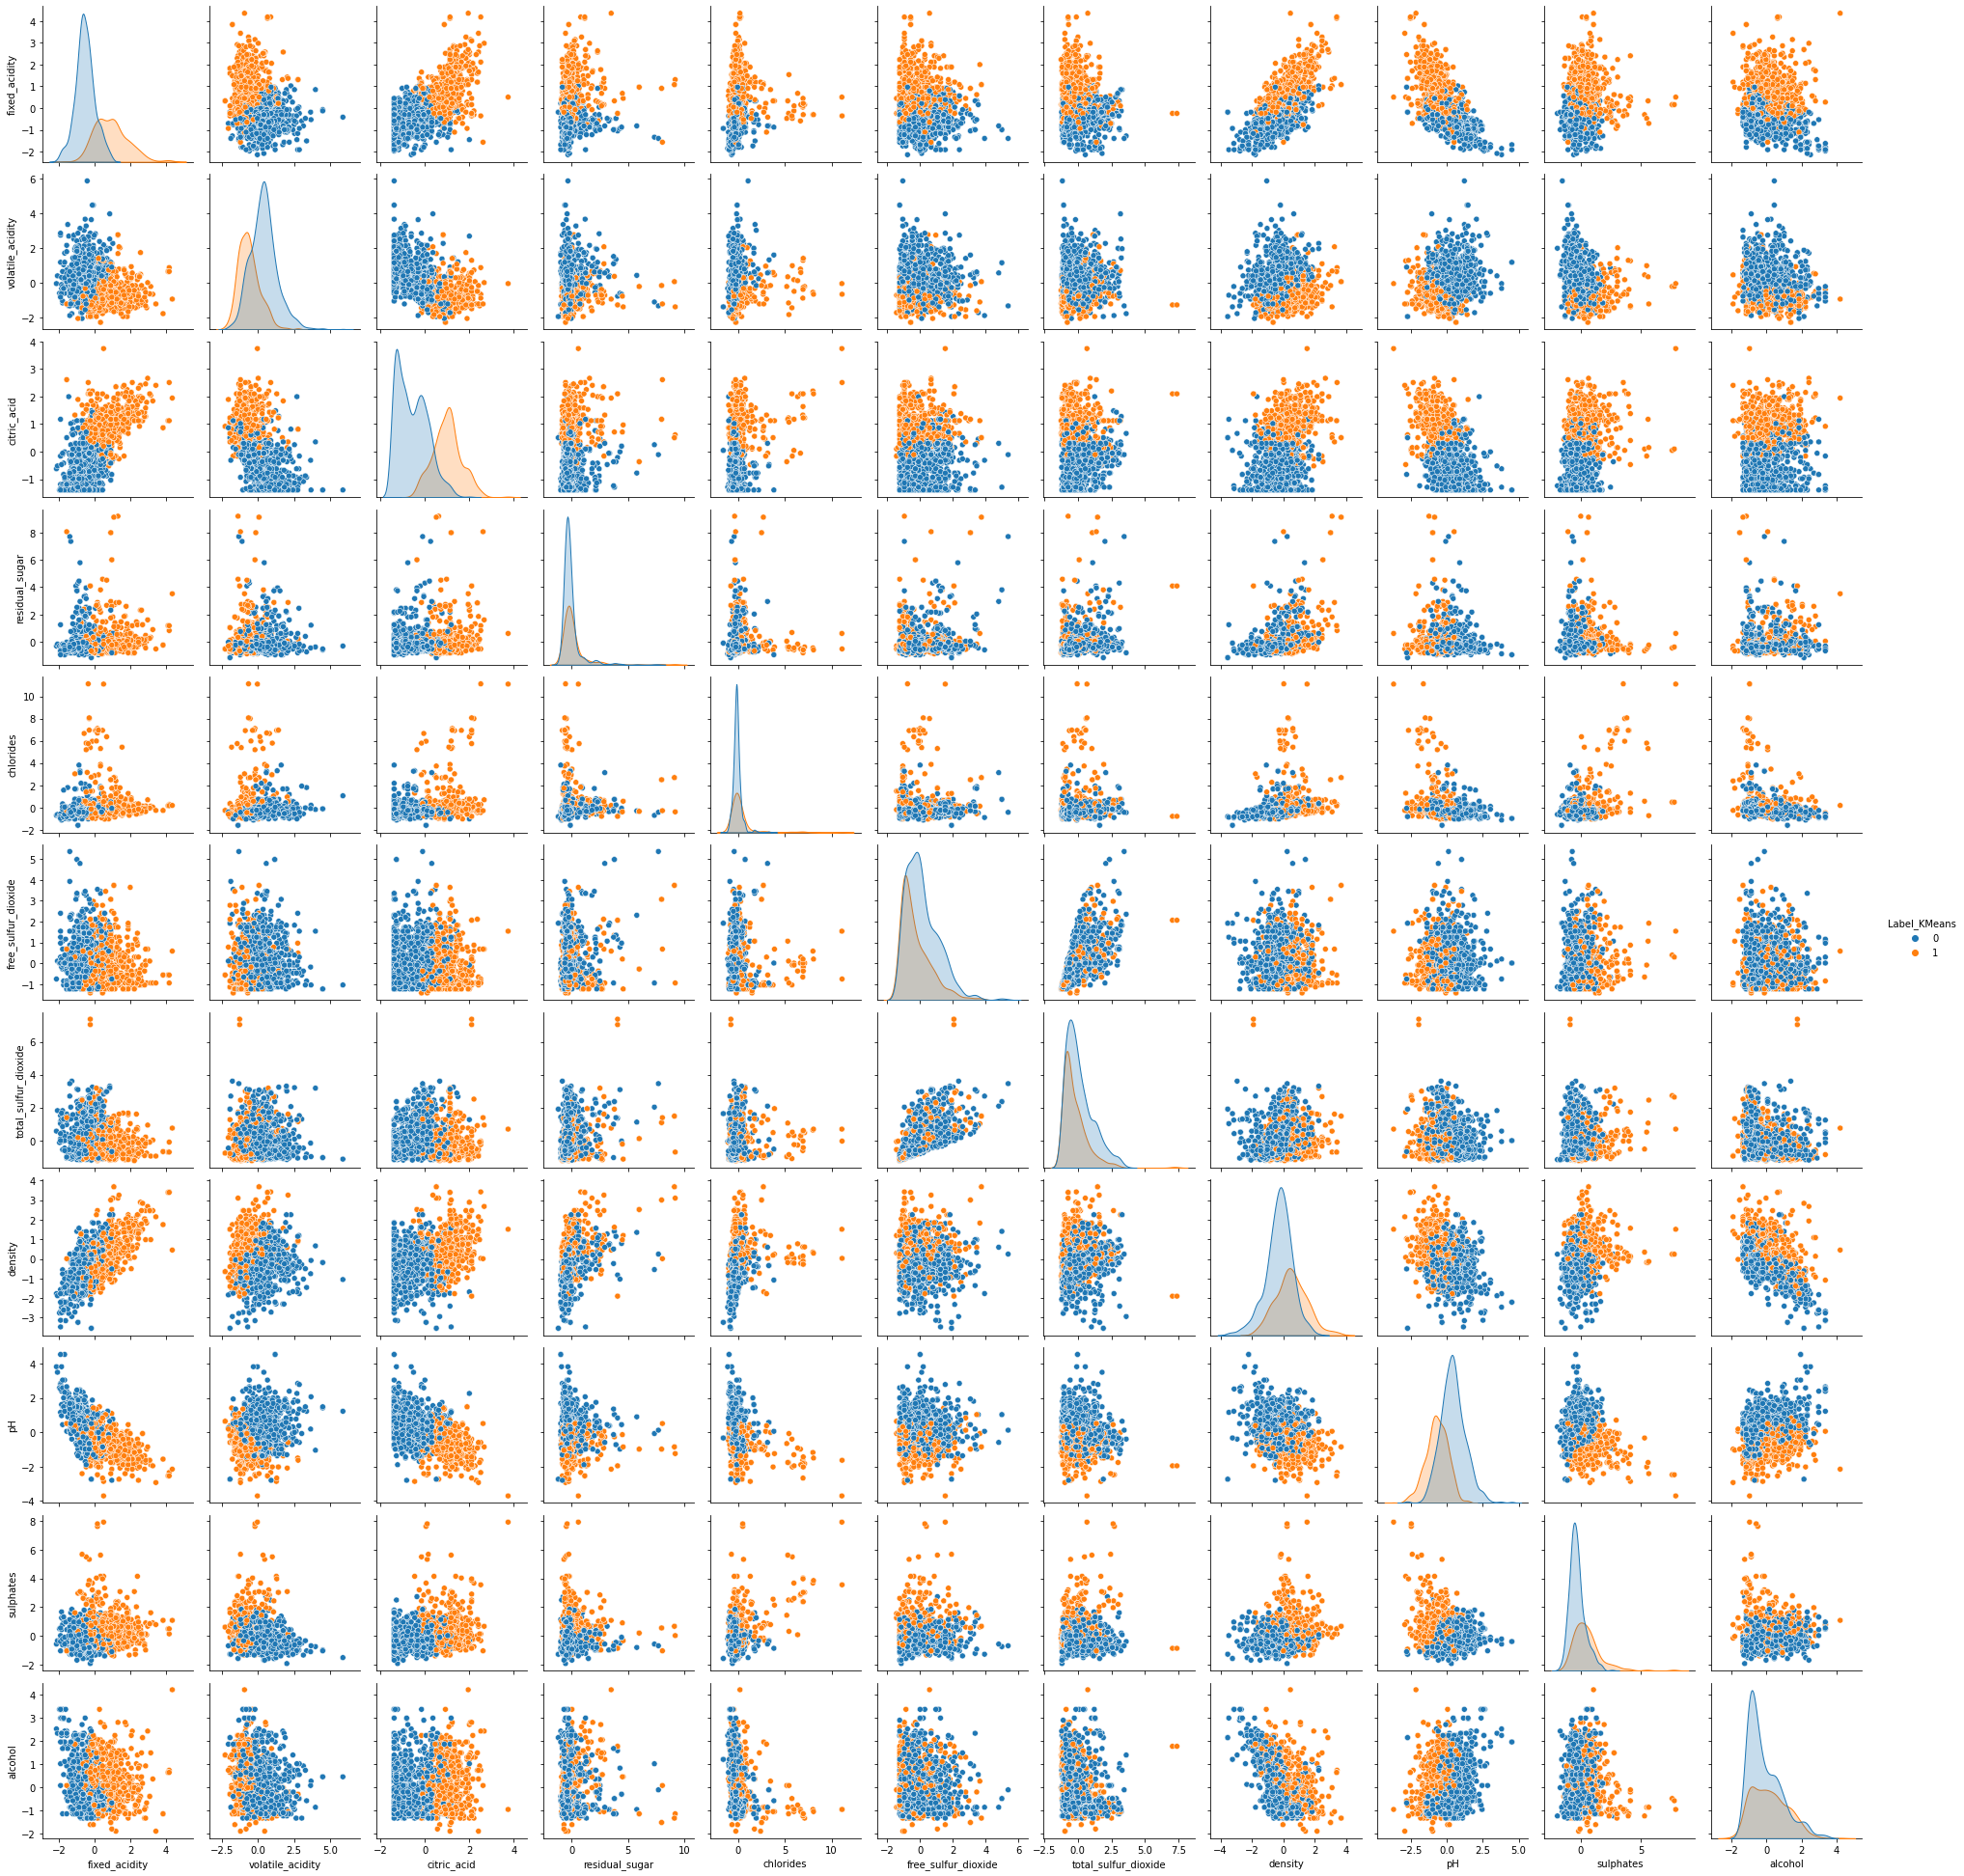

In [78]:
sns.pairplot(df_wine_scaled,hue='Label_KMeans')
plt.show()

<AxesSubplot:xlabel='alcohol', ylabel='density'>

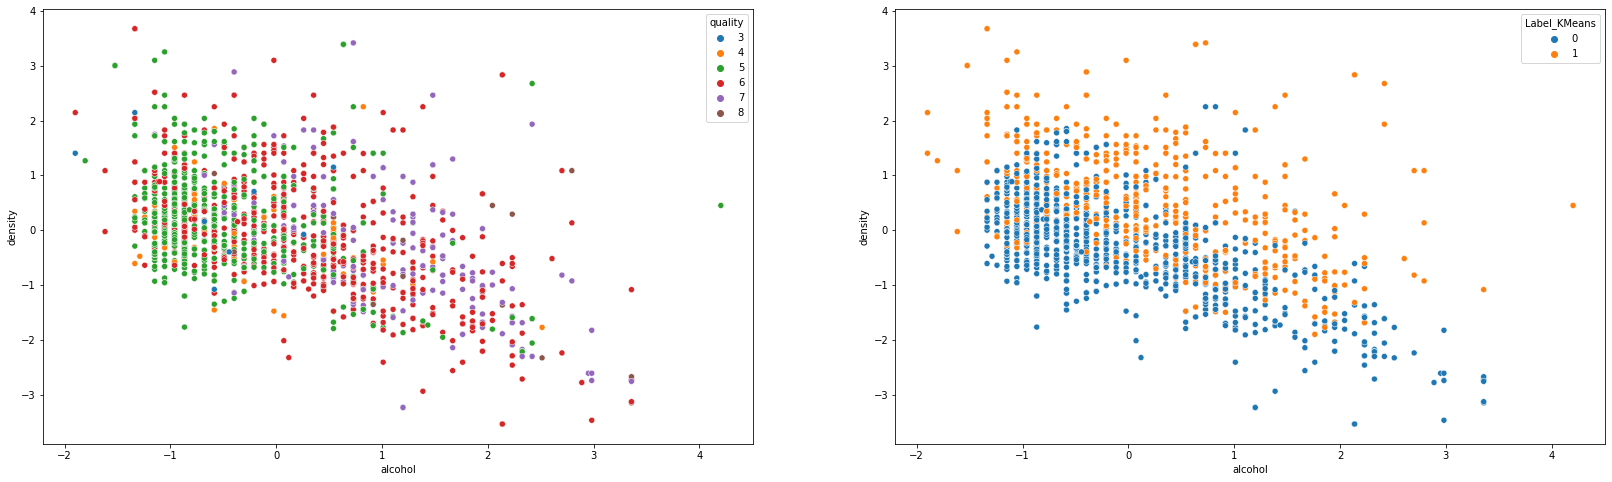

In [32]:
plt.figure(figsize=(28,8))
plt.subplot(1,2,1)
sns.scatterplot(x=df_wine_scaled.alcohol,y=df_wine_scaled.density,data=df_wine_scaled,hue=df_wine.quality,palette='tab10')

plt.subplot(1,2,2)
sns.scatterplot(x=df_new.alcohol,y=df_new.density,data=df_new,hue=df_new.Label_KMeans,palette='tab10')
